# Get TROPOMI data

In [350]:
import numpy as np
import pandas as pd
boulder = np.load("BoulderCO.npy",allow_pickle = True)
Greenbelt = np.load("Greenbelt.npy",allow_pickle = True)
newhaven = np.load("NewHavenCT.npy",allow_pickle = True)
mauna = np.load("MaunaLoaHI.npy",allow_pickle = True)
bronx = np.load("BronxNY.npy",allow_pickle = True)
charlescity = np.load("CharlesCityVA.npy",allow_pickle = True)
fairbanks = np.load("FairbanksAK.npy",allow_pickle = True)
manhattan = np.load("ManhattanNY_CCNY.npy",allow_pickle = True)
mountainview=np.load("MountainViewCA.npy",allow_pickle = True)
newbrunswick=np.load("NewBrunswickNJ.npy",allow_pickle = True)
oldfield=np.load("OldFieldNY.npy",allow_pickle = True)
queens=np.load("QueensNY.npy",allow_pickle = True)
richmond=np.load("RichmondCA.npy",allow_pickle = True)
westport=np.load("WestportCT.npy",allow_pickle = True)
wrightwood=np.load("WrightwoodCA.npy",allow_pickle = True)

In [168]:
def get_df(city,tz):
    NO2_trop_col = []
    time = []
    uncertainty = []
    lat = []
    lon = []
    for i in city:
        if i[0] != i[1]:
            if float(i[2])>=0:
                time.append(i[4])
                NO2_trop_col.append(float(i[2])*6.02e19)
                uncertainty.append(float(i[3])*6.02e19)
                lat.append(float(i[1]))
                lon.append(float(i[0]))
        else:
            pass
    city_df = pd.DataFrame({'timestamp':time,'NO2_col':NO2_trop_col,'uncertainty':uncertainty,'lon':lon,'lat':lat})
    city_df['timestamp'] = pd.to_datetime(city_df['timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ')
    city_df = city_df.sort_values(by = 'timestamp')
    city_df = city_df[(city_df['timestamp']>='20190101')&(city_df['timestamp']<='201912312359')]
    time_mask = (city_df['timestamp'].dt.hour >= 13+tz) & (city_df['timestamp'].dt.hour <= 13+tz)
    city_passby = city_df[time_mask]
    city_group = city_passby.groupby(pd.Grouper(key='timestamp',freq='1D'))
    city_avg = city_group.mean()
    city_avg = city_avg.reset_index()
    city_avg = city_avg.dropna()
    return city_avg

In [347]:
Boulder_tr = get_df(boulder,6)
Greenbelt_tr = get_df(Greenbelt,4)
newhaven_tr = get_df(newhaven,4)
mauna_tr = get_df(mauna,10)
bronx_tr = get_df(bronx,4)
charlescity_tr = get_df(charlescity,4)
fairbanks_tr = get_df(fairbanks,8)
manhattan_tr = get_df(manhattan,4)
mountainview_tr=get_df(mountainview,7)
newbrunswick_tr=get_df(newbrunswick,4)
oldfield_tr=get_df(oldfield,5)
queens_tr=get_df(queens,4)
richmond_tr=get_df(richmond,7)
westport_tr=get_df(westport,4)
wrightwood_tr=get_df(wrightwood,7)

In [351]:
mauna_tr = get_df(mauna,10)

# Get Pandora Data

In [180]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
def get_pandora_data(filename):
    fp=open(filename)
    lines = fp.readlines()
    line_list = []
    lat_raw = lines[14]
    lon_raw = lines[15]
    lat = float(lat_raw.split()[-1])
    lon = float(lon_raw.split()[-1])
    del lines[0:59]
    for i in lines:
        line = i.split()
        line[7] = float(line[7])
        line[8] = float(line[8])
        if len(line[0])<=16:
            line_list.append(line)
        elif len(line[0])>16:
            line[0] = line[0][0:15]+'Z'
    for i in range(len(line_list)):
        if line_list[i][7] < 0:
            line_list[i][7] = np.NaN
        if line_list[i][7] > 1e99:
            line_list[i][7] = np.NaN
    for i in range(len(line_list)):
        if abs(line_list[i][8]) >= 1:
            line_list[i][8] = np.NaN
    line_df = DataFrame(line_list)
    line_df = line_df[[0,7,8]]
    line_df['timestamp'] = pd.to_datetime(line_df[0],format='%Y%m%dT%H%M%SZ',errors = 'coerce')
    line_df['NO2_col'] = line_df[7]*2.687e16
    line_df['NO2_uncertainty'] = line_df[8]*2.687e16 ##changing the units into mol/m^2
    line_df = line_df[['timestamp','NO2_col','NO2_uncertainty']]
    line_df['lon'] = lon
    line_df['lat'] = lat
    line_df = line_df.dropna()
    return line_df

In [170]:
def get_pandora_data_trop(filename):
    fp=open(filename)
    lines = fp.readlines()
    line_list = []
    lat_raw = lines[14]
    lon_raw = lines[15]
    lat = float(lat_raw.split()[-1])
    lon = float(lon_raw.split()[-1])
    del lines[0:92]
    for i in lines:
        line = i.split()
        line[19] = float(line[19])
        line[20] = float(line[20])
        if len(line[0])<=16:
            line_list.append(line)
        elif len(line[0])>16:
            line[0] = line[0][0:15]+'Z'
    for i in range(len(line_list)):
        if line_list[i][19] < 0:
            line_list[i][19] = np.NaN
        if line_list[i][19] > 1e99:
            line_list[i][19] = np.NaN
    for i in range(len(line_list)):
        if abs(line_list[i][20]) >= 1:
            line_list[i][20] = np.NaN
    line_df = DataFrame(line_list)
    line_df = line_df[[0,19,20]]
    line_df['timestamp'] = pd.to_datetime(line_df[0],format='%Y%m%dT%H%M%SZ',errors = 'coerce')
    line_df['NO2_col'] = line_df[19]*2.687e16
    line_df['NO2_uncertainty'] = line_df[20]*2.687e16 ##changing the units into mol/m^2
    line_df = line_df[['timestamp','NO2_col','NO2_uncertainty']]
    line_df['lon'] = lon
    line_df['lat'] = lat
    line_df = line_df.dropna()
    return line_df

In [12]:
import datetime
from datetime import datetime
import pytz
from datetime import datetime, timedelta, timezone
import time
import seaborn as sns
import math

In [149]:
def time_process(city,tz):
    city = city[(city['timestamp']>='20190101')&(city['timestamp']<='201912312359')]
    time_mask = (city['timestamp'].dt.hour >= 13+tz) & (city['timestamp'].dt.hour <= 13+tz)
    city_passby = city[time_mask]
    city_passby_group = city_passby.groupby(pd.Grouper(key='timestamp',freq='1D'))
    city_passby_avg = city_passby_group.mean()
    city_passby_size = city_passby_group.size()
    unct_sum = city_passby_group['NO2_uncertainty'].sum()
    unct_var = city_passby_group['NO2_uncertainty'].var()
    for i in range(len(city_passby_avg)):
        city_passby_avg['NO2_uncertainty'][i] = math.sqrt((city_passby_size[i]*unct_var[i] + (unct_sum[i]**2)/city_passby_size[i])/city_passby_size[i]**2)
    city_passby_avg = city_passby_avg.dropna()
    city_passby_avg = city_passby_avg.reset_index()
    return city_passby_avg
    return city_passby_avg

# Defining plot functions

In [155]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [171]:
def plot_2(tr,pa):
    fig, ax = plt.subplots()
    plt.plot(tr['timestamp'], tr['NO2_col'],linewidth=1,label='TROPOMI-NO2_trop_col')
    plt.plot(pa['timestamp'], pa['NO2_col'],c='y',linewidth=1,label='Pandora-NO2_tot_col')
    fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)
    plt.xlabel('date')
    plt.ylabel('molecules/cm^2')
    plt.title('TROPOMI-Pandora data')
    plt.show()

In [296]:
def plot_3(tr,pa,pa_trop):
    fig, ax = plt.subplots()
    plt.plot(tr['timestamp'], tr['NO2_col'],linewidth=1,label='TROPOMI-NO2_trop_col')
    plt.plot(pa['timestamp'], pa['NO2_col'],c='y',linewidth=1,label='Pandora-NO2_tot_col')
    plt.plot(pa_trop['timestamp'], pa_trop['NO2_col'],c='brown',linewidth=1,label='Pandora-NO2_trop_col')
    fig.legend(bbox_to_anchor=(1, 0.9),bbox_transform=plt.gcf().transFigure)
    plt.xlabel('date')
    plt.ylabel('molecules/cm^2')
    plt.title('TROPOMI-Pandora data')
    plt.show()

In [322]:
def scatter_plot_no_intercept(x,y,a,b,c):
    r2 = pd.DataFrame(columns=['x','y'])
    r2['x'] = x
    r2['y']=y
    r2 = r2.dropna()
    new_x_train = np.array(r2['x'][:]).reshape(-1,1)
    new_x_test = np.array(r2['x'][:]).reshape(-1,1)

    new_y_train = np.array(r2['y'][:]).reshape(-1,1)
    new_y_test = np.array(r2['y'][:]).reshape(-1,1)

    regr = linear_model.LinearRegression(fit_intercept=False)

    regr.fit(new_x_train, new_y_train)

    new_y_pred = regr.predict(new_x_test)

    print('Slope:', regr.coef_)
    print('Intercept:',regr.intercept_)
    print('Mean squared error:',mean_squared_error(new_y_test, new_y_pred))
    print('Coefficient of determination:',r2_score(new_y_test, new_y_pred))

    plt.scatter(new_x_test, new_y_test,  color='black')
    plt.plot(new_x_test, new_y_pred, color='blue', linewidth=3)
    plt.plot(new_y_test, new_y_test, color='r', linewidth=3)


    plt.xlabel(a+'  (molecules/cm^2)')
    plt.ylabel(b+'  (molecules/cm^2)')
    plt.title(c)

    plt.show()

In [323]:
def scatter_plot_with_intercept(x,y,a,b,c):
    r2 = pd.DataFrame(columns=['x','y'])
    r2['x'] = x
    r2['y']=y
    r2 = r2.dropna()
    new_x_train = np.array(r2['x'][:]).reshape(-1,1)
    new_x_test = np.array(r2['x'][:]).reshape(-1,1)

    new_y_train = np.array(r2['y'][:]).reshape(-1,1)
    new_y_test = np.array(r2['y'][:]).reshape(-1,1)

    regr = linear_model.LinearRegression()

    regr.fit(new_x_train, new_y_train)

    new_y_pred = regr.predict(new_x_test)

    print('Slope:', regr.coef_)
    print('Intercept:',regr.intercept_)
    print('Mean squared error:',mean_squared_error(new_y_test, new_y_pred))
    print('Coefficient of determination:',r2_score(new_y_test, new_y_pred))

    plt.scatter(new_x_test, new_y_test,  color='black')
    plt.plot(new_x_test, new_y_pred, color='blue', linewidth=3)
    plt.plot(new_y_test, new_y_test, color='r', linewidth=3)


    plt.xlabel(a+'  (molecules/cm^2)')
    plt.ylabel(b+'  (molecules/cm^2)')
    plt.title(c)

    plt.show()

# Defining interpolate functions

In [192]:
from scipy import interpolate
import astropy
from astropy.time import Time

In [202]:
def to_julian_day(timestamp):
    timestamp = Time(timestamp).jd
    return timestamp

In [211]:
def interpolation(_from,_to):
    f_from = interpolate.interp1d(_from['timestamp'],_from['NO2_col'],bounds_error=False)
    interp = f_from(_to['timestamp'])
    return interp

# Boulder

In [222]:
Boulder_pa = get_pandora_data('Pandora57s1_BoulderCO_L2Tot_rnvs1p1-7.txt')

In [225]:
Boulder_pa_trop = get_pandora_data_trop('Pandora57s1_BoulderCO_L2Trop_rnvh1p1-7.txt')

In [224]:
Boulder_pa = time_process(Boulder_pa,6)

C:\Users\张心怡\AppData\Local\Temp/ipykernel_10212/3233913862.py:11: RuntimeWarning: invalid value encountered in double_scalars
  city_passby_avg['NO2_uncertainty'][i] = math.sqrt((city_passby_size[i]*unct_var[i] + (unct_sum[i]**2)/city_passby_size[i])/city_passby_size[i]**2)


In [226]:
Boulder_pa_trop = time_process(Boulder_pa_trop,6)

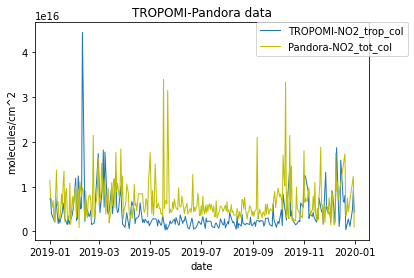

In [227]:
plot_2(Boulder_tr,Boulder_pa)

In [228]:
Boulder_tr['timestamp'] = to_julian_day(Boulder_tr['timestamp'])

In [229]:
Boulder_pa['timestamp'] = to_julian_day(Boulder_pa['timestamp'])

In [230]:
tropomi_Boulder_interp = interpolation(Boulder_tr,Boulder_pa)

Slope: [[0.26262483]]
Intercept: [5.67743643e+15]
Mean squared error: 1.8583402608739374e+31
Coefficient of determination: 0.06552890184145788


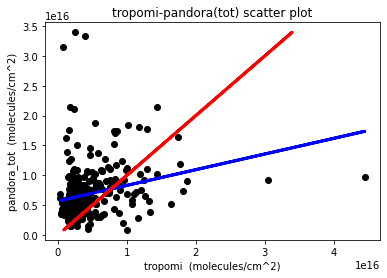

In [324]:
scatter_plot_with_intercept(tropomi_Boulder_interp,Boulder_pa['NO2_col'],'tropomi','pandora_tot','tropomi-pandora(tot) scatter plot')

Slope: [[0.24951526]]
Intercept: [2.48952253e+15]
Mean squared error: 1.7655766369372083e+31
Coefficient of determination: 0.0655289018414581


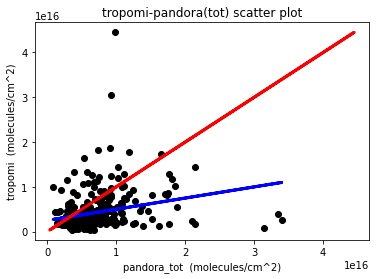

In [325]:
scatter_plot_with_intercept(Boulder_pa['NO2_col'],tropomi_Boulder_interp,'pandora_tot','tropomi','tropomi-pandora(tot) scatter plot')

# Greenbelt

In [243]:
Greenbelt_pa = get_pandora_data('Pandora32s1_GreenbeltMD_L2Tot_rnvs0p1-5.txt')

In [244]:
Greenbelt_pa_trop = get_pandora_data_trop('Pandora32s1_GreenbeltMD_L2Trop_rnvh1p1-7.txt')

In [245]:
Greenbelt_pa = time_process(Greenbelt_pa,4)
Greenbelt_pa_trop = time_process(Greenbelt_pa_trop,4)

C:\Users\张心怡\AppData\Local\Temp/ipykernel_10212/3233913862.py:11: RuntimeWarning: invalid value encountered in double_scalars
  city_passby_avg['NO2_uncertainty'][i] = math.sqrt((city_passby_size[i]*unct_var[i] + (unct_sum[i]**2)/city_passby_size[i])/city_passby_size[i]**2)


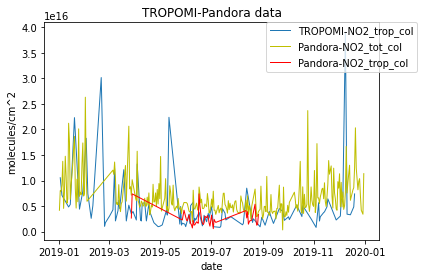

In [246]:
plot_3(Greenbelt_tr,Greenbelt_pa,Greenbelt_pa_trop)

In [247]:
Greenbelt_tr['timestamp'] = to_julian_day(Greenbelt_tr['timestamp'])

In [248]:
Greenbelt_pa_trop['timestamp'] = Time(Greenbelt_pa_trop['timestamp']).jd

In [249]:
Greenbelt_pa['timestamp'] = Time(Greenbelt_pa['timestamp']).jd

In [252]:
##interpolating TROPOMI against Pandora(trop)
tropomi_interp_trop = interpolation(Greenbelt_tr,Greenbelt_pa_trop)

In [253]:
##interpolating TROPOMI against Pandora(tot)
tropomi_interp_tot = interpolation(Greenbelt_tr,Greenbelt_pa)

Slope: [[0.99789758]]
Intercept: 0.0
Mean squared error: 5.09882817056749e+30
Coefficient of determination: -0.5766551123066015


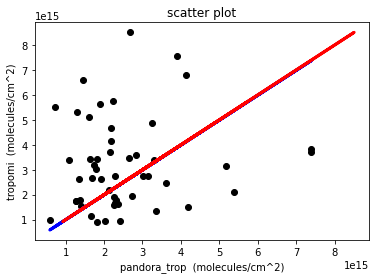

In [327]:
scatter_plot_no_intercept(Greenbelt_pa_trop['NO2_col'],tropomi_interp_trop,'pandora_trop','tropomi','scatter plot')

Slope: [[0.22885512]]
Intercept: [5.63807263e+15]
Mean squared error: 1.252833754007304e+31
Coefficient of determination: 0.08523338265266578


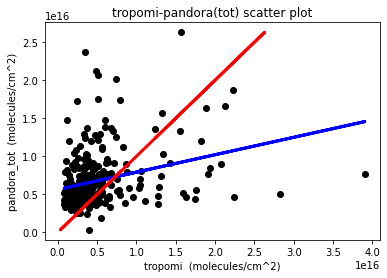

In [328]:
scatter_plot_with_intercept(tropomi_interp_tot,Greenbelt_pa['NO2_col'],'tropomi','pandora_tot','tropomi-pandora(tot) scatter plot')

Slope: [[0.3724338]]
Intercept: [2.39310392e+15]
Mean squared error: 2.0388341701463646e+31
Coefficient of determination: 0.08523338265266589


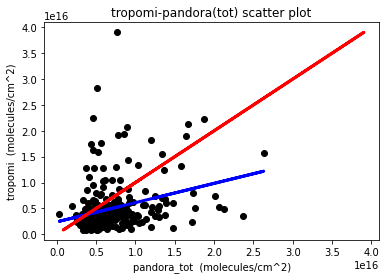

In [329]:
scatter_plot_with_intercept(Greenbelt_pa['NO2_col'],tropomi_interp_tot,'pandora_tot','tropomi','tropomi-pandora(tot) scatter plot')


Stratospheric NO2 column


In [283]:
green_pandora_trop_interp = interpolation(Greenbelt_pa,Greenbelt_pa_trop)

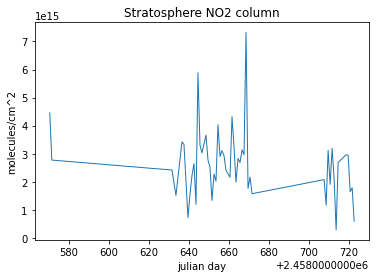

In [238]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(Greenbelt_pa_trop['timestamp'], pa_Greenbelt_interp-Greenbelt_pa_trop['NO2_trop_col'],linewidth=1)
plt.xlabel('julian day')
plt.ylabel('molecules/cm^2')
plt.title('Stratosphere NO2 column')
plt.show()

In [368]:
strat_greenbelt=(green_pandora_trop_interp-Greenbelt_pa_trop['NO2_col']).mean()

Slope: [[-0.16130215]]
Intercept: [3.02767048e+15]
Mean squared error: 1.4192580559086686e+30
Coefficient of determination: 0.03529520313191925


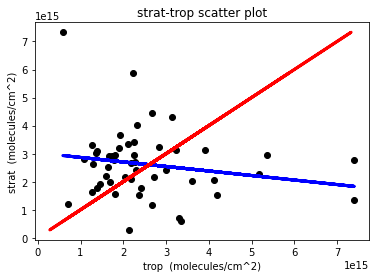

In [330]:
scatter_plot_with_intercept(Greenbelt_pa_trop['NO2_col'],green_pandora_trop_interp-Greenbelt_pa_trop['NO2_col'],'trop','strat','strat-trop scatter plot')

Slope: [[0.82469396]]
Intercept: 0.0
Mean squared error: 2.5425337473546535e+31
Coefficient of determination: -0.14076222069207822


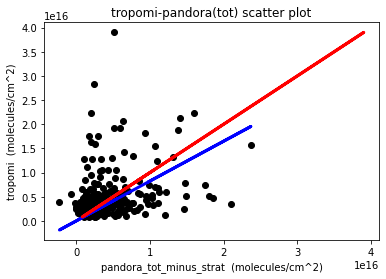

In [500]:
scatter_plot_no_intercept(Greenbelt_pa['NO2_col']-strat_greenbelt,tropomi_interp_tot,'pandora_tot_minus_strat','tropomi','tropomi-pandora(tot) scatter plot')

# NewHavenCT

In [291]:
newhaven_pa = get_pandora_data('Pandora64s1_NewHavenCT_L2Tot_rnvs1p1-7.txt')

In [292]:
newhaven_pa_trop = get_pandora_data_trop('Pandora64s1_NewHavenCT_L2Trop_rnvh1p1-7.txt')

In [293]:
newhaven_pa = time_process(newhaven_pa,4)

In [294]:
newhaven_pa_trop = time_process(newhaven_pa_trop,4)

C:\Users\张心怡\AppData\Local\Temp/ipykernel_10212/3233913862.py:11: RuntimeWarning: invalid value encountered in double_scalars
  city_passby_avg['NO2_uncertainty'][i] = math.sqrt((city_passby_size[i]*unct_var[i] + (unct_sum[i]**2)/city_passby_size[i])/city_passby_size[i]**2)


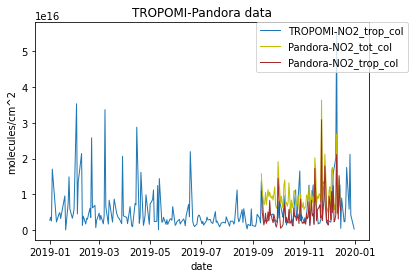

In [297]:
plot_3(newhaven_tr,newhaven_pa,newhaven_pa_trop)

In [298]:
newhaven_tr['timestamp'] = Time(newhaven_tr['timestamp']).jd

In [299]:
newhaven_pa['timestamp'] = Time(newhaven_pa['timestamp']).jd

In [300]:
newhaven_pa_trop['timestamp'] = Time(newhaven_pa_trop['timestamp']).jd

In [302]:
f_newhaven_tropomi = interpolate.interp1d(newhaven_tr['timestamp'],newhaven_tr['NO2_col'],bounds_error=False)
tropomi_newhaven_interp = f_newhaven_tropomi(newhaven_pa['timestamp'])

In [303]:
f_newhaven_tropomi_trop = interpolate.interp1d(newhaven_tr['timestamp'],newhaven_tr['NO2_col'],bounds_error=False)
tropomi_newhaven_trop_interp = f_newhaven_tropomi_trop(newhaven_pa_trop['timestamp'])

Slope: [[0.89229513]]
Intercept: 0.0
Mean squared error: 4.242539772604695e+31
Coefficient of determination: 0.024671888461197722


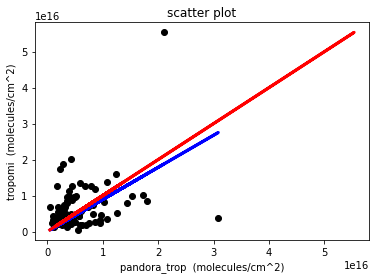

In [332]:
scatter_plot_no_intercept(newhaven_pa_trop['NO2_col'],tropomi_newhaven_trop_interp,'pandora_trop','tropomi','scatter plot')

Slope: [[0.49868003]]
Intercept: [1.39924314e+15]
Mean squared error: 3.8154507607694483e+31
Coefficient of determination: 0.12654388961679597


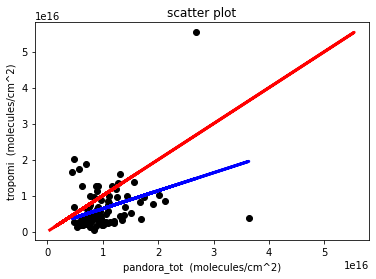

In [333]:
scatter_plot_with_intercept(newhaven_pa['NO2_col'],tropomi_newhaven_interp,'pandora_tot','tropomi','scatter plot')

In [334]:
pandora_tot_new_interp = interpolation(newhaven_pa,newhaven_pa_trop)

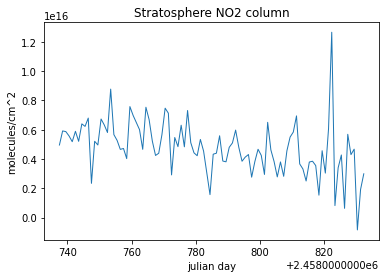

In [364]:
fig, ax = plt.subplots()
plt.plot(newhaven_pa_trop['timestamp'], pandora_tot_new_interp-newhaven_pa_trop['NO2_col'],linewidth=1)
plt.xlabel('julian day')
plt.ylabel('molecules/cm^2')
plt.title('Stratosphere NO2 column')
plt.show()

In [366]:
strat_newhaven = (pandora_tot_new_interp-newhaven_pa_trop['NO2_col']).mean()

Slope: [[-0.08963315]]
Intercept: [5.25556364e+15]
Mean squared error: 3.1077761047117725e+30
Coefficient of determination: 0.0566970233070605


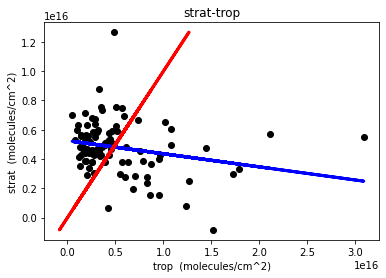

In [338]:
scatter_plot_with_intercept(newhaven_pa_trop['NO2_col'],pandora_tot_new_interp-newhaven_pa_trop['NO2_col'],'trop','strat','strat-trop')

Slope: [[0.89854648]]
Intercept: 0.0
Mean squared error: 4.466775223685184e+31
Coefficient of determination: -0.02256125356190397


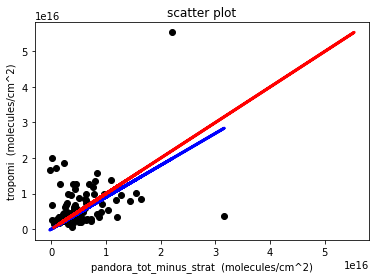

In [501]:
scatter_plot_no_intercept(newhaven_pa['NO2_col']-strat_newhaven,tropomi_newhaven_interp,'pandora_tot_minus_strat','tropomi','scatter plot')

# MaunaLoaHI

In [342]:
mauna_pa = get_pandora_data('Pandora59s1_MaunaLoaHI_L2Tot_rnvs1p1-7.txt')

In [343]:
mauna_pa_trop = get_pandora_data_trop('Pandora59s1_MaunaLoaHI_L2Trop_rnvh1p1-7.txt')

In [344]:
mauna_pa = time_process(mauna_pa,10)

C:\Users\张心怡\AppData\Local\Temp/ipykernel_10212/3233913862.py:11: RuntimeWarning: invalid value encountered in double_scalars
  city_passby_avg['NO2_uncertainty'][i] = math.sqrt((city_passby_size[i]*unct_var[i] + (unct_sum[i]**2)/city_passby_size[i])/city_passby_size[i]**2)


In [345]:
mauna_pa_trop = time_process(mauna_pa_trop,10)

C:\Users\张心怡\AppData\Local\Temp/ipykernel_10212/3233913862.py:11: RuntimeWarning: invalid value encountered in double_scalars
  city_passby_avg['NO2_uncertainty'][i] = math.sqrt((city_passby_size[i]*unct_var[i] + (unct_sum[i]**2)/city_passby_size[i])/city_passby_size[i]**2)


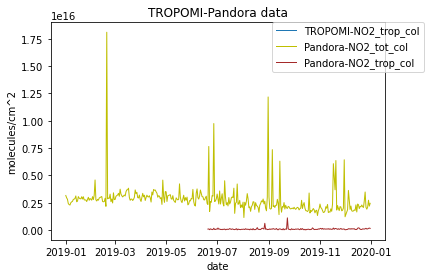

In [346]:
plot_3(mauna_tr,mauna_pa,mauna_pa_trop)

In [355]:
mauna_pa['timestamp'] = to_julian_day(mauna_pa['timestamp'])

In [356]:
mauna_pa_trop['timestamp'] = to_julian_day(mauna_pa_trop['timestamp'])

In [360]:
pandora_mauna_tot_interp = interpolation(mauna_pa,mauna_pa_trop)

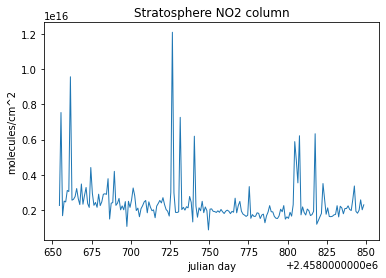

In [365]:
fig, ax = plt.subplots()
plt.plot(mauna_pa_trop['timestamp'], pandora_mauna_tot_interp-mauna_pa_trop['NO2_col'],linewidth=1)
plt.xlabel('julian day')
plt.ylabel('molecules/cm^2')
plt.title('Stratosphere NO2 column')
plt.show()

In [367]:
strat_mauna=(pandora_mauna_tot_interp-mauna_pa_trop['NO2_col']).mean()

Slope: [[-0.61329628]]
Intercept: [2.45903427e+15]
Mean squared error: 1.6714552900826835e+30
Coefficient of determination: 0.0019004778611664275


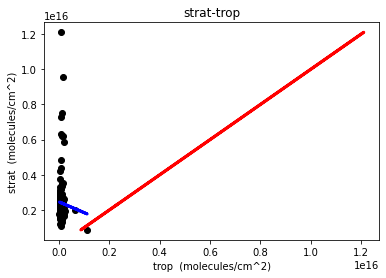

In [361]:
scatter_plot_with_intercept(mauna_pa_trop['NO2_col'],pandora_mauna_tot_interp-mauna_pa_trop['NO2_col'],'trop','strat','strat-trop')

Slope: [[-0.00309879]]
Intercept: [1.02360507e+14]
Mean squared error: 8.445335658597941e+27
Coefficient of determination: 0.0019004778611663165


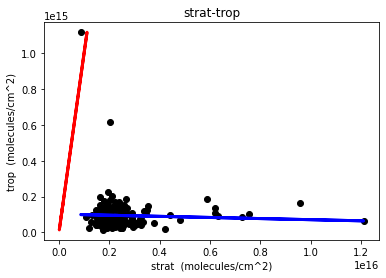

In [362]:
scatter_plot_with_intercept(pandora_mauna_tot_interp-mauna_pa_trop['NO2_col'],mauna_pa_trop['NO2_col'],'strat','trop','strat-trop')

In [370]:
print(strat_newhaven,strat_mauna,strat_greenbelt)

4786761758063760.0 2400819652804297.5 2619577934673239.5


In [379]:
strat=(strat_mauna+strat_greenbelt)/2

# BronxNY

In [380]:
bronx_pa = get_pandora_data('Pandora147s1_BronxNY_L2Tot_rnvs1p1-7.txt')

In [381]:
bronx_pa = time_process(bronx_pa,4)

C:\Users\张心怡\AppData\Local\Temp/ipykernel_10212/3233913862.py:11: RuntimeWarning: invalid value encountered in double_scalars
  city_passby_avg['NO2_uncertainty'][i] = math.sqrt((city_passby_size[i]*unct_var[i] + (unct_sum[i]**2)/city_passby_size[i])/city_passby_size[i]**2)


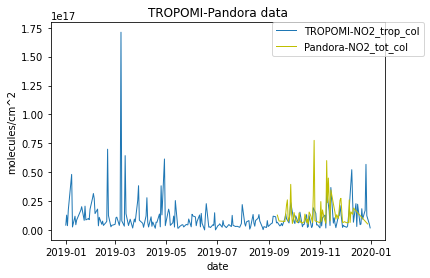

In [382]:
plot_2(bronx_tr,bronx_pa)

In [383]:
bronx_pa['NO2_col'] = bronx_pa['NO2_col']-strat

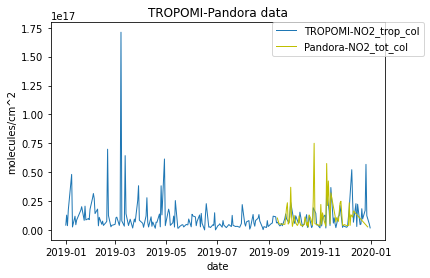

In [384]:
plot_2(bronx_tr,bronx_pa)

In [385]:
bronx_tr['timestamp']=Time(bronx_tr['timestamp']).jd

In [386]:
bronx_pa['timestamp']=Time(bronx_pa['timestamp']).jd

In [387]:
bronx_tr_interp = interpolation(bronx_tr,bronx_pa)

In [494]:
diff = bronx_pa['NO2_col'].mean()-bronx_tr_interp.mean()

Slope: [[0.64248236]]
Intercept: 0.0
Mean squared error: 8.513043819594124e+31
Coefficient of determination: -0.08274441600101956


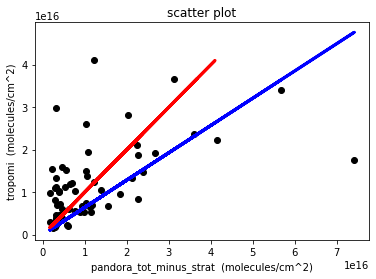

In [497]:
scatter_plot_no_intercept(bronx_pa['NO2_col']-diff,bronx_tr_interp,'pandora_tot_minus_strat','tropomi','scatter plot')

# CharlesCityVA

In [392]:
charlescity_pa = get_pandora_data('Pandora31s1_CharlesCityVA_L2Tot_rnvs1p1-7.txt')

In [394]:
charlescity_pa = time_process(charlescity_pa,4)

C:\Users\张心怡\AppData\Local\Temp/ipykernel_10212/3233913862.py:11: RuntimeWarning: invalid value encountered in double_scalars
  city_passby_avg['NO2_uncertainty'][i] = math.sqrt((city_passby_size[i]*unct_var[i] + (unct_sum[i]**2)/city_passby_size[i])/city_passby_size[i]**2)


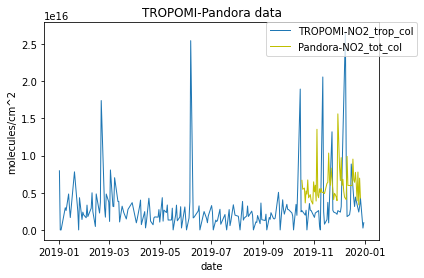

In [395]:
plot_2(charlescity_tr,charlescity_pa)

In [396]:
charlescity_pa['NO2_col']=charlescity_pa['NO2_col']-strat

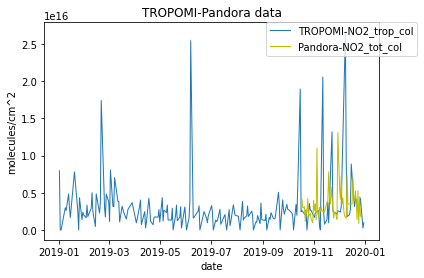

In [397]:
plot_2(charlescity_tr,charlescity_pa)

In [398]:
charlescity_pa['timestamp']=Time(charlescity_pa['timestamp']).jd

In [399]:
charlescity_tr['timestamp']=Time(charlescity_tr['timestamp']).jd

In [400]:
charlescity_tr_interp = interpolation(charlescity_tr,charlescity_pa)

In [486]:
diff = charlescity_pa['NO2_col'].mean()-charlescity_tr_interp.mean()

Slope: [[0.72958905]]
Intercept: 0.0
Mean squared error: 2.0914219508028077e+31
Coefficient of determination: -0.29163673591874484


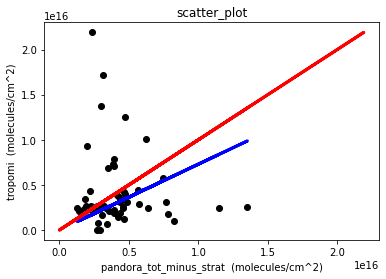

In [491]:
scatter_plot_no_intercept(charlescity_pa['NO2_col']-diff,charlescity_tr_interp,'pandora_tot_minus_strat','tropomi','scatter_plot')

# FairbanksAK

In [423]:
fairbanks_pa = get_pandora_data('Pandora29s1_FairbanksAK_L2Tot_rnvs1p1-7.txt')

In [424]:
fairbanks_pa = time_process(fairbanks_pa,8)

C:\Users\张心怡\AppData\Local\Temp/ipykernel_10212/3233913862.py:11: RuntimeWarning: invalid value encountered in double_scalars
  city_passby_avg['NO2_uncertainty'][i] = math.sqrt((city_passby_size[i]*unct_var[i] + (unct_sum[i]**2)/city_passby_size[i])/city_passby_size[i]**2)


In [426]:
fairbanks_tr = get_df(fairbanks,8)

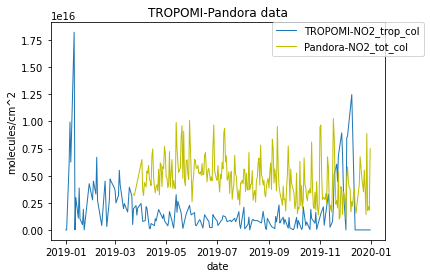

In [427]:
plot_2(fairbanks_tr,fairbanks_pa)

In [429]:
fairbanks_pa['NO2_col']=fairbanks_pa['NO2_col']-strat

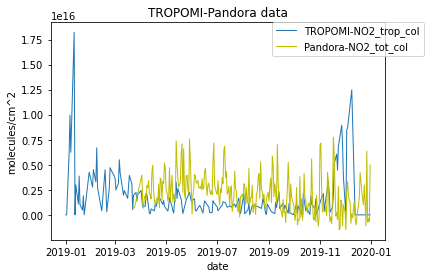

In [430]:
plot_2(fairbanks_tr,fairbanks_pa)

In [431]:
fairbanks_pa['timestamp']=Time(fairbanks_pa['timestamp']).jd

In [432]:
fairbanks_tr['timestamp']=Time(fairbanks_tr['timestamp']).jd

In [433]:
fairbanks_tr_interp = interpolation(fairbanks_tr,fairbanks_pa)

In [481]:
diff = fairbanks_pa['NO2_col'].mean()-fairbanks_tr_interp.mean()

Slope: [[0.38761402]]
Intercept: 0.0
Mean squared error: 9.484547257285288e+30
Coefficient of determination: -0.29099954285682417


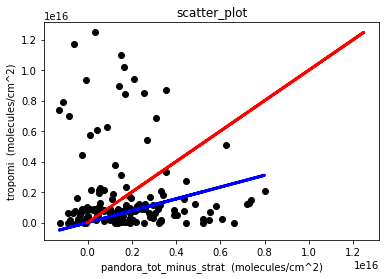

In [484]:
scatter_plot_no_intercept(fairbanks_pa['NO2_col']-diff,fairbanks_tr_interp,'pandora_tot_minus_strat','tropomi','scatter_plot')

# ManhattanNY_CCNY

In [448]:
manhattan_pa = get_pandora_data('Pandora135s1_ManhattanNY-CCNY_L2Tot_rnvs1p1-7.txt')

In [450]:
manhattan_pa = time_process(manhattan_pa,4)

C:\Users\张心怡\AppData\Local\Temp/ipykernel_10212/3233913862.py:11: RuntimeWarning: invalid value encountered in double_scalars
  city_passby_avg['NO2_uncertainty'][i] = math.sqrt((city_passby_size[i]*unct_var[i] + (unct_sum[i]**2)/city_passby_size[i])/city_passby_size[i]**2)


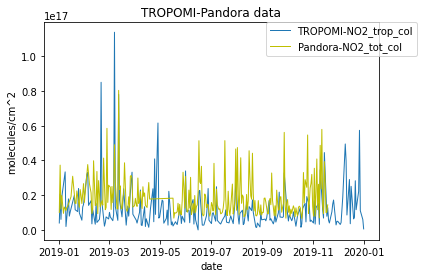

In [451]:
plot_2(manhattan_tr,manhattan_pa)

In [456]:
manhattan_pa['timestamp']=Time(manhattan_pa['timestamp']).jd
manhattan_tr['timestamp']=Time(manhattan_tr['timestamp']).jd

In [457]:
manhattan_tr_interp = interpolation(manhattan_tr,manhattan_pa)

In [478]:
diff=manhattan_pa['NO2_col'].mean()-manhattan_tr_interp.mean()

5360818709841822.0

Slope: [[0.73080194]]
Intercept: 0.0
Mean squared error: 9.28001209000062e+31
Coefficient of determination: 0.13529357661742913


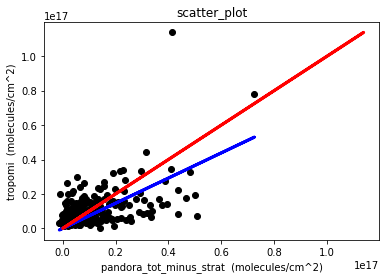

In [479]:
scatter_plot_no_intercept(manhattan_pa['NO2_col']-diff,manhattan_tr_interp,'pandora_tot_minus_strat','tropomi','scatter_plot')

# NewBrunswickNJ

In [475]:
newbrunswick_pa = get_pandora_data('Pandora69s1_NewBrunswickNJ_L2Tot_rnvs0p1-7.txt')

In [476]:
newbrunswick_pa = time_process(newbrunswick_pa,4)

C:\Users\张心怡\AppData\Local\Temp/ipykernel_10212/3233913862.py:11: RuntimeWarning: invalid value encountered in double_scalars
  city_passby_avg['NO2_uncertainty'][i] = math.sqrt((city_passby_size[i]*unct_var[i] + (unct_sum[i]**2)/city_passby_size[i])/city_passby_size[i]**2)


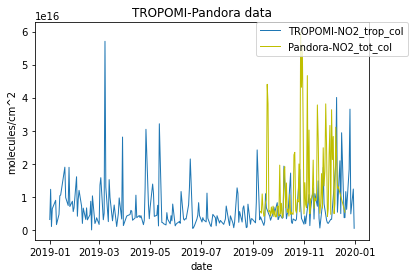

In [477]:
plot_2(newbrunswick_tr,newbrunswick_pa)

In [502]:
newbrunswick_pa['timestamp'] = Time(newbrunswick_pa['timestamp']).jd

In [503]:
newbrunswick_tr['timestamp'] = Time(newbrunswick_tr['timestamp']).jd

In [504]:
newbrunswick_tr_interp = interpolation(newbrunswick_tr,newbrunswick_pa)

In [507]:
strat_newb = newbrunswick_pa['NO2_col'].mean()-newbrunswick_tr_interp.mean()

In [508]:
strat_newb

7509306260251951.0

Slope: [[0.24102982]]
Intercept: 0.0
Mean squared error: 5.090239545583957e+31
Coefficient of determination: -1.4493393076758427


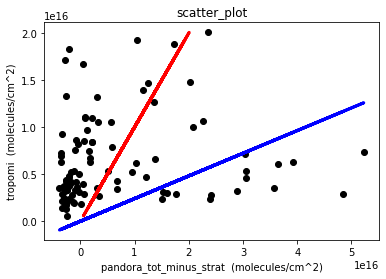

In [511]:
scatter_plot_no_intercept(newbrunswick_pa['NO2_col']-strat_newb,newbrunswick_tr_interp,'pandora_tot_minus_strat','tropomi','scatter_plot')